# VAE+PE 

## Train VAE

In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np

from starccato_jax.data import load_data
import matplotlib.pyplot as plt
import os

HERE = os.getcwd()
model_savedir = f"{HERE}/model_out"

train_data, val_data = load_data()

plt.figure(figsize=(3, 2.5))
for i in range(100):
    plt.plot(train_data[i], color='k', lw=0.3, alpha=0.2);
plt.savefig(f"{model_savedir}/training_data.png")


![](model_out/training_data.png)

Epoch 0: Train Loss: 1.194e+00, Val Loss: 1.193e+00


TypeError: Object of type ArrayImpl is not JSON serializable

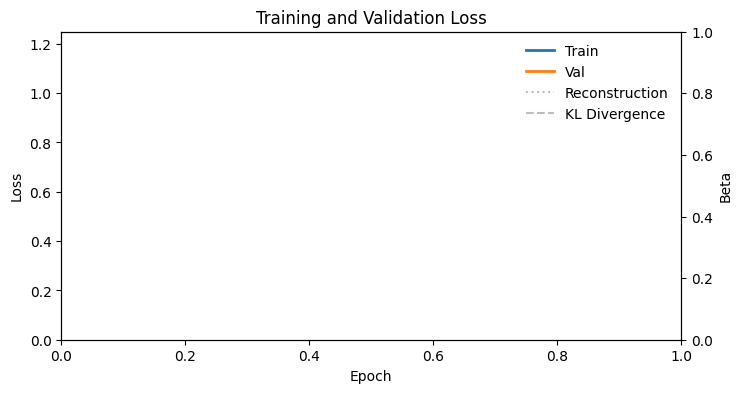

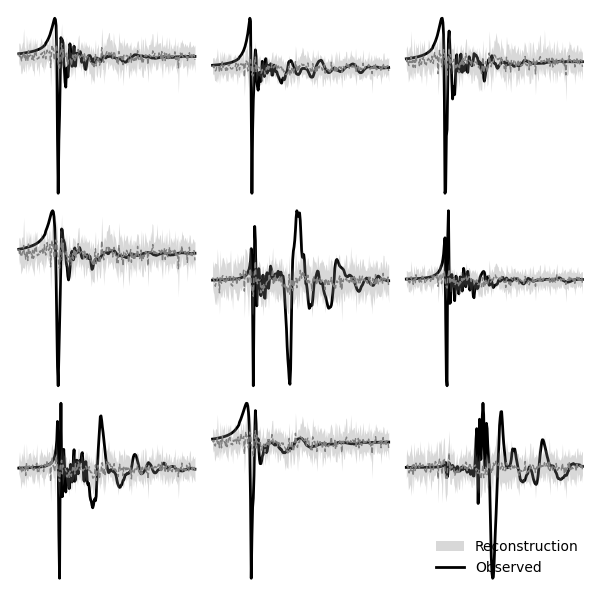

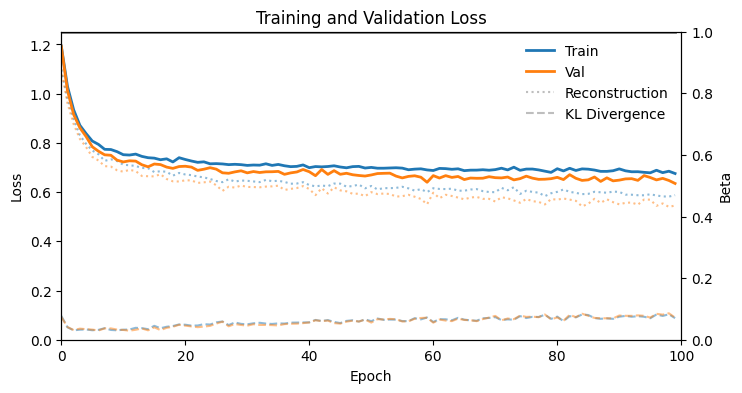

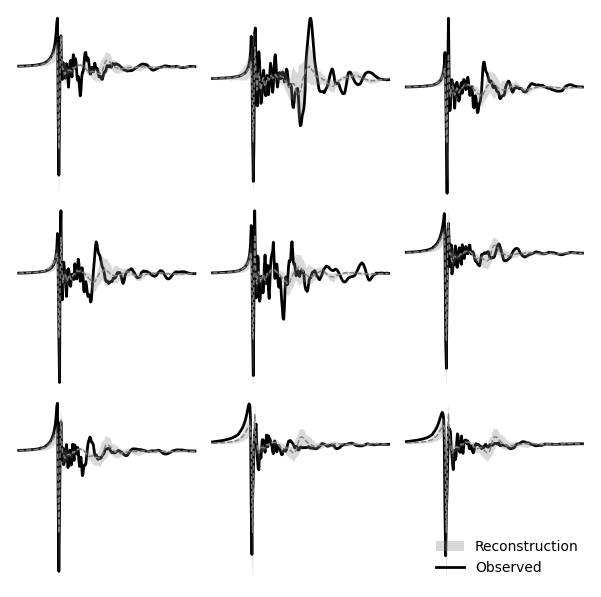

In [30]:
from starccato_jax.trainer import train_vae, Config

config = Config(
    latent_dim=8,
    epochs=100,
    cyclical_annealing_cycles=0
)

train_vae(train_data, val_data, config, save_dir=model_savedir)

| Loss | Reconstruction|
|---|---|
|![loss]| ![reconstructions] | 

[loss]: model_out/loss.png
[reconstructions]: model_out/reconstructions.png

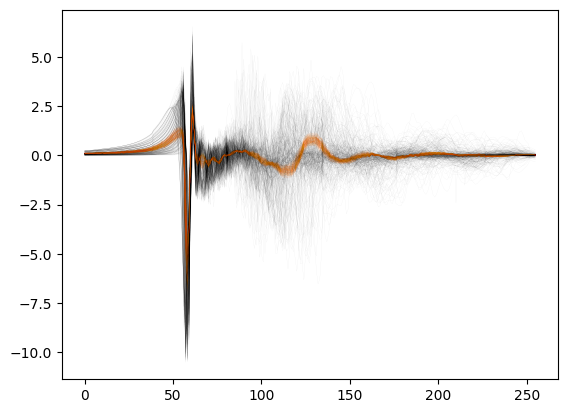

In [28]:
from starccato_jax.io import load_model
from starccato_jax.model import generate
import jax

n = len(val_data)
zs = jax.random.uniform(jax.random.PRNGKey(0), (n, config.latent_dim))
model_data = load_model(model_savedir)

generated_signal = generate(model_data, z=zs)
for i in range(n):
    kwgs = dict(lw=0.1, alpha=0.1)
    plt.plot(generated_signal[i], color='tab:orange', **kwgs)
    plt.plot(val_data[i], color='k', **kwgs)

## MCMC on one validation dataset

/Users/avaj0001/Documents/projects/starccato_jax/src/starccato_jax/sampler.py:40: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=nchains, progress_bar=True)
sample: 100%|██████████| 2500/2500 [00:03<00:00, 725.51it/s, 31 steps of size 9.18e-02. acc. prob=0.81]


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
z[0]  0.732  0.233   0.258    1.000      0.005    0.004    1782.0    1784.0   
z[1]  0.722  0.225   0.296    1.000      0.005    0.004    1898.0    2120.0   
z[2]  0.492  0.280   0.001    0.932      0.006    0.005    1818.0    1695.0   
z[3]  0.342  0.255   0.001    0.818      0.006    0.005    1864.0    1748.0   
z[4]  0.070  0.073   0.000    0.205      0.001    0.001    1853.0    1544.0   
z[5]  0.424  0.265   0.000    0.886      0.006    0.005    1879.0    1963.0   
z[6]  0.656  0.229   0.228    0.999      0.006    0.004    1635.0    1780.0   
z[7]  0.882  0.117   0.664    1.000      0.002    0.002    2249.0    1867.0   

      r_hat  
z[0]    1.0  
z[1]    1.0  
z[2]    1.0  
z[3]    1.0  
z[4]    1.0  
z[5]    1.0  
z[6]    1.0  
z[7]    1.0  


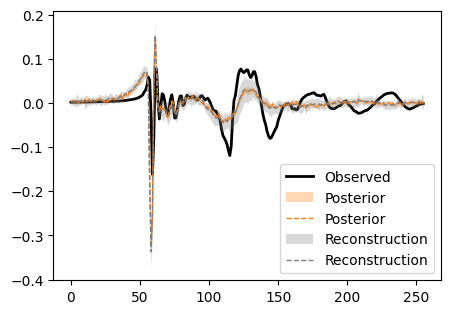

In [21]:
from starccato_jax.sampler import sample_latent_vars_given_data

mcmc_out = sample_latent_vars_given_data(train_data[54], model_savedir, rng_int=0, outdir=f"{HERE}/out_mcmc2")

In [14]:
import arviz as az

inf_data = az.from_numpyro(mcmc_out)
az.summary(inf_data, var_names=['z'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z[0],0.665,0.255,0.167,1.000,0.004,0.003,4032.0,2538.0,1.0
z[1],0.691,0.255,0.191,1.000,0.004,0.003,3499.0,2218.0,1.0
z[2],0.371,0.257,0.001,0.836,0.004,0.003,3778.0,2524.0,1.0
z[3],0.937,0.064,0.821,1.000,0.001,0.001,4269.0,1812.0,1.0
z[4],0.930,0.063,0.813,1.000,0.001,0.001,3241.0,1865.0,1.0
z[5],0.245,0.215,0.000,0.671,0.003,0.003,3919.0,1991.0,1.0
z[6],0.232,0.208,0.000,0.634,0.004,0.004,3176.0,1761.0,1.0
z[7],0.513,0.285,0.061,0.994,0.004,0.003,4266.0,1838.0,1.0
z[8],0.397,0.282,0.001,0.905,0.005,0.004,4029.0,2473.0,1.0
z[9],0.333,0.259,0.000,0.823,0.004,0.004,3750.0,2122.0,1.0


|        | |
|--------|--|
| Trace  | ![trace_plot][trace_plot] |
| Corner | ![corner_plot][corner_plot] |
| CI     | ![ci_plot][ci_plot] |


[ci_plot]: out_mcmc/ci_plot.png
[corner_plot]: out_mcmc/corner_plot.png
[trace_plot]: out_mcmc/trace_plot.png

## Exploring better number of Z


In [ ]:
from starccato_jax.trainer import train_vae, Config

for z_size in [4, 8, 12, 16, 20]:
    config = Config(latent_dim=z_size, epochs=200)
    train_vae(train_data, val_data, config,
              save_dir=f"{HERE}/model_exploration/model_z{z_size}"
              )

In [ ]:
z_sizes = [4, 8, 12, 16, 20]

train_losses, val_losses = [], []
for z_size in z_sizes:
    # read the losses
    loss_fpath = f"{HERE}/model_exploration/model_z{z_size}/losses.txt"
    data = np.loadtxt(loss_fpath)
    train_losses.append(data[-1, 0])
    val_losses.append(data[-1, 1])

## PLOT
plt.figure(figsize=(8, 4))
plt.plot(z_sizes, train_losses, label="Train Loss")
plt.plot(z_sizes, val_losses, label="Val Loss")
plt.xlabel('Latent Dimension')
plt.ylabel('Loss')
plt.legend()



At 500 epochs:



![](model_exploration/loss_vs_z.png)